# Overlay of a torus, sphere and swiss roll

'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

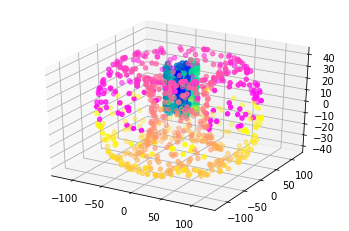

In [42]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
#%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs
import random

roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=100, r=15)
torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
roll = roll*2

data = np.concatenate([torus, roll, sphere], axis=0)
labels = np.concatenate([y_t, y_r, y_s], axis=0)
#tadasets.plot3d(data)
cmaps = [plt.cm.winter, plt.cm.spring]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for data, color, cmap in zip([roll, torus],[y_r, y_t], cmaps):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color, cmap=cmap)

plt.show()

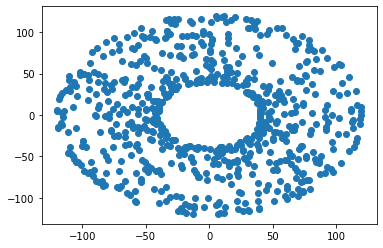

In [2]:
from sklearn import cluster, datasets, mixture

circle = datasets.make_circles(500, factor=0)
fig = plt.figure()
ax = fig.add_subplot(111)
cmaps = [plt.cm.winter, plt.cm.spring]

ax.scatter(data[:, 0], data[:, 1], cmap=cmap)


# Only 3d sphere

'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

(500, 3)

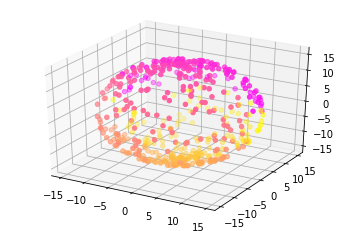

In [3]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)
cmaps = plt.cm.winter
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
data.shape
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=y_s, cmap=cmap)

plt.show()

In [4]:
sphere.shape

(500, 3)

# 3d-2d vis

'\nTrying out Tadasets library for generating topological synthetic datasets:\nHere an overlay of a torus, sphere and swiss roll\n'

(500, 3)

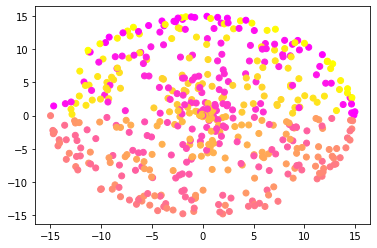

In [5]:
'''
Trying out Tadasets library for generating topological synthetic datasets:
Here an overlay of a torus, sphere and swiss roll
'''
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)
cmaps = plt.cm.winter
fig = plt.figure()
ax = fig.add_subplot(111)
data.shape
ax.scatter(data[:, 0], data[:, 1], c=y_s, cmap=cmap)

plt.show()

# Gnerate Solid Sphere

In [6]:
def sphere(n=100, r=1, noise=None, ambient=None):
    """
        Sample `n` data points on a sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """

    theta = np.random.random((n,)) * 2.0 * np.pi
    phi = np.random.random((n,)) * np.pi
    rad = np.ones((n,)) * r

    data = np.zeros((n, 3))

    data[:, 0] = rad * np.cos(theta) * np.cos(phi)
    data[:, 1] = rad * np.cos(theta) * np.sin(phi)
    data[:, 2] = rad * np.sin(theta)

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        data = embed(data, ambient)

    return data, theta

def solid_sphere(n=100, r=1, noise=None, ambient=None):
    """
        Sample `n` data points on a sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """
    
    theta = np.random.random((n,)) * 2.0 * np.pi
    theta.shape
    phi = np.random.random((n,)) * np.pi
    rad = np.ones((n,)) * r

    data = np.zeros((n, 3))

    data[:, 0] = rad * np.cos(theta) * np.cos(phi)
    data[:, 1] = rad * np.cos(theta) * np.sin(phi)
    data[:, 2] = rad * np.sin(theta)

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        data = embed(data, ambient)

    return data, theta

def dsphere(n=100, d=2, r=1, noise=None, ambient=None):
    """
    Sample `n` data points on a d-sphere.
    Parameters
    -----------
    n : int
        Number of data points in shape.
    r : float
        Radius of sphere.
    ambient : int, default=None
        Embed the sphere into a space with ambient dimension equal to `ambient`. The sphere is randomly rotated in this high dimensional space.
    """
    data = np.random.randn(n, d + 1)

    # Normalize points to the sphere
    data = r * data / np.sqrt(np.sum(data ** 2, 1)[:, None])

    if noise:
        data += noise * np.random.randn(*data.shape)

    if ambient:
        assert ambient > d, "Must embed in higher dimensions"
        data = embed(data, ambient)

    return data

def scatter_sphere(x,y,typeD='3d'):
#     cmaps = plt.cm.winter
    cmaps = plt.cm.winter
    fig = plt.figure()
    if typeD is '3d':
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=cmap)
    else:
        ax = fig.add_subplot(111)
        ax.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap)
    plt.show()

    

In [7]:
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import math
import pandas as pd

# sphere, y_s = solid_sphere(n=500, r=15)

# n = 500
# r = 15
# d = 2
# theta = np.random.random((n,)) * 2.0 * np.pi
# # theta
# phi = np.random.random((n,)) * np.pi
# rad = np.ones((n,)) * r

# data = np.zeros((n, 3))

# data[:, 0] = rad * np.sin(theta) * np.cos(phi)
# data[:, 1] = rad * np.sin(theta) * np.sin(phi)
# data[:, 2] = rad * np.cos(theta)

# theta belone [0,2pi]  phi belone[0,pi]
# data.shape

# scatter_sphere(data, theta, '3d')


# d = 3;                               /* dimension = number of variables */
# N = 1000;                            /* sample size = number of obs     */
# radius = 2;                          /* radius of circle */
# Y = randfun(N // d, "Normal");       /* Y ~ MVN(0, I(d)) */
# u = randfun(N, "Uniform");           /* U ~ U(0,1)       */
# r = radius * u##(1/d);               /* r proportional to d_th root of U */
# X = r # Y / sqrt(Y[,##]);


def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T

def random_ball_num (numpointsAll, dimension, radiusAll=[1,1], num=2, ratio=1):
    from numpy import random, linalg
    dataAll = []
    yAll = []
    for i in range(num):
        radius = radiusAll[i]
        # First generate random directions by normalizing the length of a
        # vector of random-normal values (these distribute evenly on ball).
        num_points = numpointsAll[i]
        random_directions = random.normal(size=(dimension,num_points))
        random_directions /= linalg.norm(random_directions, axis=0)
        # Second generate a random radius with probability proportional to
        # the surface area of a ball with a given radius.
        random_radii = random.random(num_points) ** (1/dimension)
        # Return the list of random (direction & length) points.
        tmp = radius * (random_directions * random_radii).T
        tmp_ratio = np.zeros(tmp.shape)
        tmp_ratio[:,dimension-1]=ratio
        tmp = tmp + i*tmp_ratio
        y_s = np.zeros(num_points,dtype=int)+i
        dataAll.append(tmp)
        yAll.extend(y_s.flatten().astype('int'))
    dataAll = np.vstack(dataAll)
#     yAll = np.vstack(yAll)
    return dataAll,yAll



(4000, 3)

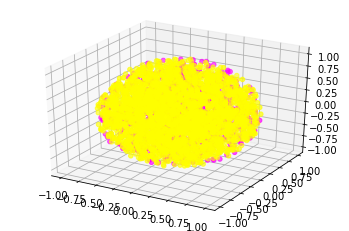

4000

,0,1,2,label
0,-0.836630,0.446655,-0.162235,0
1,0.394051,-0.025973,-0.686584,0
2,-0.169228,0.188131,-0.725820,0
3,0.081082,-0.076056,-0.095854,0
4,0.247828,0.663817,0.186834,0
...,...,...,...,...
3995,0.451891,-0.121108,0.067588,1
3996,0.642958,0.014459,0.661490,1
3997,-0.818182,0.145090,-0.317198,1
3998,-0.328046,0.426670,-0.552827,1


In [8]:
# data = random_ball(1000,3,1)
# data.shape
# scatter_sphere(data, y_s)
# type(data)
scale = [1,0.8,0.5,0.2,0]
point_num = [1000,3000]
dimension = 3
data,y_s = random_ball_num(point_num,dimension,[1,1],2,0)
# data = np.vstack(data)
data.shape
scatter_sphere(data, y_s)
feature = range(dimension)
df = pd.DataFrame(data,columns=feature)
label = 'label'
len(y_s)
# y_s = y_s.flatten().astype('int') #vstack 把2个label 弄成2,1000 维的，摊开成20000
df[label] = y_s
df
# tmp = np.zeros(data.shape)
# tmp[:,0] = 1
# tmp

In [20]:
def vis_2d_(points,y):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y) + 1))))
    target = np.hstack([y])
    sns.set(style='white', context='poster')
    fig, ax = plt.subplots(1, figsize=(4, 2))
    plt.scatter(*points.T, s=1, color=colors[y], cmap='Spectral', alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
#     cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
#     cbar.set_ticks(np.arange(10))

# Compare different MDS over overlapping

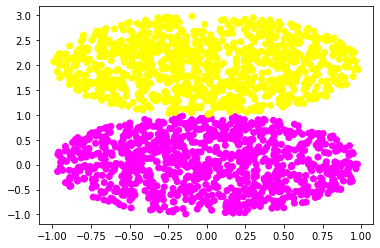

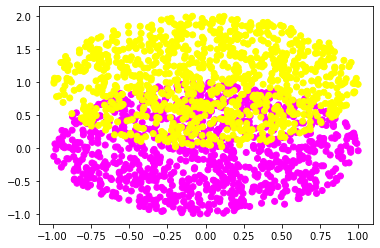

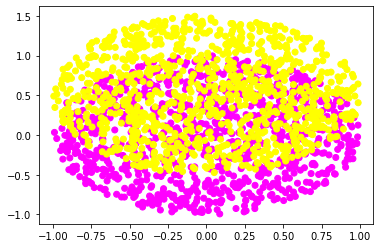

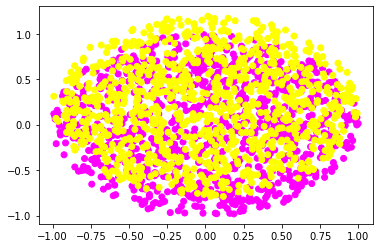

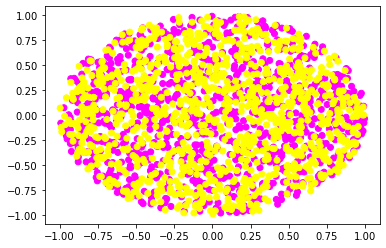

In [70]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
point_num = [1000,1000]
ratios = [2,1,0.5,0.2,0]
datasets = []
for i in ratios:
    dataset = random_ball_num(point_num,2,ratio=i)
    data_2d, y_s = dataset
    datasets.append(dataset)
    scatter_sphere(data_2d,y_s,'2d')
# y = [0 for i in data_2d]


# UMAP、T-SNE、MDS、PCA、LDA

In [65]:
import umap
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA, LatentDirichletAllocation

random_state = 42
mds = ['t-sne', 'umap', 'mds', 'pca'
#        , 'lda'
      ]
params = {
    "tsne_perplexity":30,
    "min_dist":1,
    "n_neighbors":15,
    "n_components":2
    
}
algo = [
        TSNE(random_state=random_state, perplexity=params["tsne_perplexity"]),
        umap.UMAP(n_components = params["n_components"], min_dist=params["min_dist"],
                                                n_neighbors=params["n_neighbors"],
                                                random_state=random_state),
        MDS(n_components=params["n_components"], random_state=random_state),
        PCA(n_components=params["n_components"], random_state=random_state),
#         LatentDirichletAllocation(n_components=params["n_components"], random_state=random_state),
       ]

<Figure size 1512x936 with 0 Axes>

Text(0.5, 1.0, 't-sne')

Text(0.5, 1.0, 'umap')

Text(0.5, 1.0, 'mds')

Text(0.5, 1.0, 'pca')

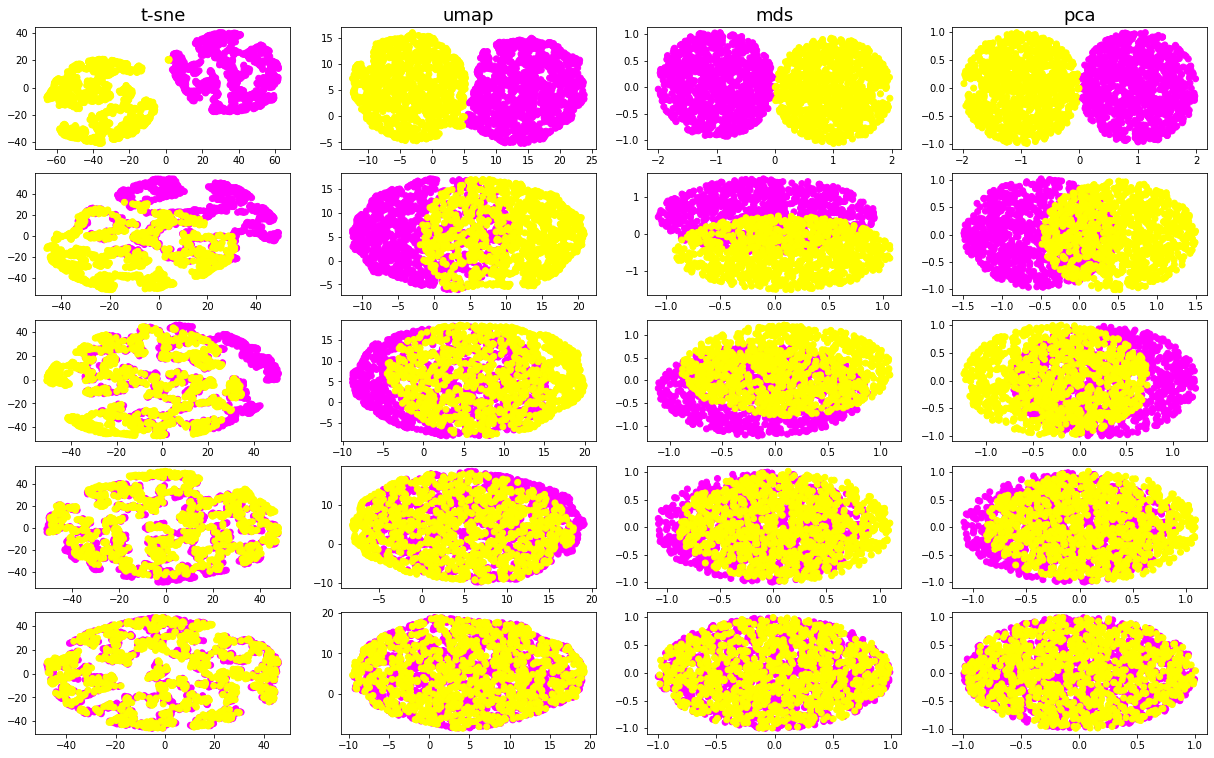

In [69]:
plt.figure(figsize=(9 * 2 + 3, 13))
plot_num = 1
for i_dataset,item_dataset in enumerate(datasets):
    data_2d,y_s = item_dataset
    for name,algo_item in zip(mds,algo):
        embedding = algo_item.fit_transform(data_2d)
#         embedding.shape
        cmaps = plt.cm.winter
        ax = plt.subplot(len(datasets), len(algo), plot_num)
        ax.scatter(embedding[:, 0], embedding[:, 1], c=y_s, cmap=cmap)
        if i_dataset == 0:
            plt.title(name, size=18)
#         ax.text(name)
#         scatter_sphere(embedding,y_s,'2d')
        plot_num += 1
plt.show()

# Metric_Overlapping

In [10]:
from sklearn.neighbors  import kneighbors_graph
from sklearn.preprocessing import normalize

A = kneighbors_graph(df[feature],20,include_self=False)
edges_x1, edges_x2 = A.nonzero()
num_labels = len(np.unique(y_s))
overlap_label = np.zeros((num_labels,num_labels))
for x1, x2 in zip(edges_x1, edges_x2):
    overlap_label[y_s[x1]][y_s[x2]]+=1
overlap_label
# overlap_label = normalize(overlap_label, axis=0)
overlap_label = overlap_label/overlap_label.sum(axis=1,keepdims=1)
for i in range(num_labels):
    overlap_label[i][i] = 0
overlap_label


IndexError: list index out of range

# 2D ball

In [ ]:
n = 1000
u = np.random.random((n))
v = np.random.random((n))
r = u**0.5  # sqrt function
theta = 2* np.pi *v
data[:,0] = r*np.cos(theta)
data[:,1] = r*np.sin(theta)
y = np.ones(n)
scatter_sphere(data,y,'2d')

In [ ]:
%matplotlib notebook
import numpy as np
#import tadasets
import matplotlib.pyplot as plt
import custom_shapes as cs

# roll, y_r = cs.swiss_roll(n=400, r=20)
sphere, y_s = cs.sphere(n=500, r=15)
# torus, y_t = cs.torus(n=700, c=4, a=2)

#shift the shapes in space:
# torus = torus*20
#sphere[:,2] = sphere[:,2] - 30
# roll = roll*2

data = np.concatenate([sphere], axis=0)
labels = np.concatenate([y_s], axis=0)
#tadasets.plot3d(data)

fig = plt.figure()
ax = fig.add_subplot(111)
data.shape
ax.scatter(data[:, 0], data[:, 1], c=y_s, cmap=cmap)

plt.show()

In [ ]:
from spheres import create_sphere_dataset
n_samples = 500
d = 100
n_spheres = 11
r = 5
seed = 42
# def __init__(self, train=True, n_samples=500, d=100, n_spheres=11, r=5,
#                 test_fraction=0.1, seed=42):
        #here pos are actually class labels, just conforming with parent class!
data, labels = create_sphere_dataset(n_samples, d, n_spheres, r, seed=seed)
data.shape
labels